In [1]:
%cd /content/drive/MyDrive/Data Mining/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/Data Mining/4. Clustering - Gaussian Mixture Model


In [2]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [6]:
data = pd.read_csv('Country-data.csv')
data.head()
dataset = data.iloc[:,1:]
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<function matplotlib.pyplot.show(close=None, block=None)>

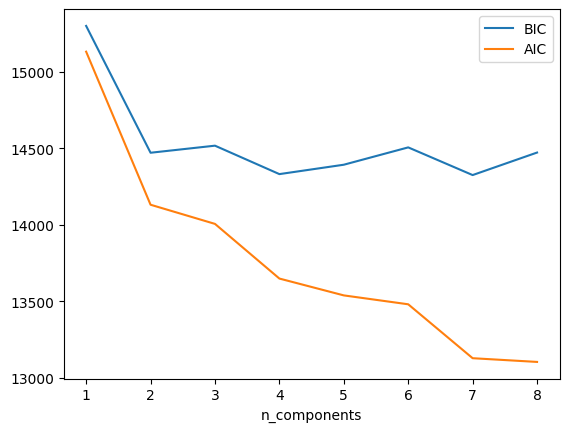

In [8]:
#Find optimal number of clusters
n_components = np.arange(1, 9)
models = [GaussianMixture(n, random_state=1502).fit(dataset)
          for n in n_components]
plt.plot(n_components, [m.bic(dataset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(dataset) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show

In [9]:
#GMM
model = GaussianMixture(n_components=4, random_state=1502).fit(dataset)

In [10]:
#Interpretation

#Predicting Cluster by Country

cluster = pd.Series(model.predict(dataset))
cluster[:3]

0    0
1    2
2    2
dtype: int64

In [11]:
#assing cluster in the data frame
data['Cluster'] = cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [18]:
#searching specific country
data.loc[data['country']=='Brazil']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.8,11200,2,0.0,0.0,1.0,0.0


In [16]:
from urllib.request import proxy_bypass
#Creating the probabilities of belonging in any cluster

proxy_bypass = round(pd.DataFrame(model.predict_proba(dataset)),2)
proxy_bypass.head(2)

,0,1,2,3
0,1.00,0.0,0.00,0.0
1,0.13,0.0,0.87,0.0


In [17]:
#joining probabilities with data
data = pd.concat([data, proxy_bypass], axis=1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1.00,0.0,0.00,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0.13,0.0,0.87,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0.01,0.0,0.99,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1.00,0.0,0.00,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0.00,0.0,1.00,0.0


In [20]:
#interpretation

interpretation = pd.DataFrame(model.means_, columns=list(dataset.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,66.846300,31.896830,6.232848,46.039461,4341.258795,10.197586,63.698617,4.015042,1956.588160
1,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
2,17.081825,45.524950,6.546408,48.290282,16409.070974,6.939257,74.553385,2.073424,9449.315379
3,5.228185,45.069273,9.238110,41.275377,38909.739415,2.887746,80.007217,1.866028,37526.367387
